In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
charging_set_complete = pd.read_csv("data/cleaned_charging_set.csv")

In [96]:
charging_set_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62362 entries, 0 to 62361
Data columns (total 48 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  62362 non-null  object 
 1   connectionTime                      62362 non-null  object 
 2   disconnectTime                      62362 non-null  object 
 3   doneChargingTime                    62362 non-null  object 
 4   kWhDelivered                        62362 non-null  float64
 5   sessionID                           62362 non-null  object 
 6   siteID                              62362 non-null  int64  
 7   spaceID                             62362 non-null  object 
 8   stationID                           62362 non-null  object 
 9   userID                              62362 non-null  float64
 10  WhPerMile                           62362 non-null  float64
 11  kWhRequested                        62362

In [97]:
weather_set = pd.read_csv("data/cleaned_weather_set.csv")

In [98]:
charging_set_site1 = charging_set_complete[charging_set_complete["siteID"] == 1]
charging_set_site2 = charging_set_complete[charging_set_complete["siteID"] == 2]

In [99]:
#charging_set_site1 = charging_set_site1.drop(["paymentRequired_present","WhPerMile_present","kWhRequested_present","milesRequested_present","minutesAvailable_present","modifiedAt_present","requestedDeparture_present"],axis = 1)
#charging_set_site1 = charging_set_site1.drop(["userID", "id","timezone"], axis=1)
#charging_set_site2 = charging_set_site2.drop(["paymentRequired_present","WhPerMile_present","kWhRequested_present","milesRequested_present","minutesAvailable_present","modifiedAt_present","requestedDeparture_present"],axis = 1)
#charging_set_site2 = charging_set_site2.drop(["userID", "id","timezone"], axis=1)
df_no_duplicates = charging_set_site1.drop_duplicates()
charging_set_site1.head()

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,userID,...,requestedDeparture_year,requestedDeparture_month,requestedDeparture_day,requestedDeparture_time,requestedDeparture_weekday,connectionDuration,chargingDuration,connect_weekday,disconnect_weekday,chargingDone_disconnect_difference
0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,194.0,...,2020.0,1.0,2.0,20:51:54,3.0,6.039167,4.378056,3,3,1.661111
1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,4275.0,...,2020.0,1.0,2.0,23:31:50,3.0,9.025278,6.687500,3,3,2.337778
2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,344.0,...,2020.0,1.0,2.0,14:56:35,3.0,10.713056,2.641944,3,4,8.071111
3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,1117.0,...,2020.0,1.0,2.0,15:04:58,3.0,2.644722,1.313056,3,3,1.331667
4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,334.0,...,2020.0,1.0,2.0,22:24:01,3.0,8.144167,4.291389,3,3,3.852778


In [100]:
amount_spaces1 = charging_set_site1["spaceID"].nunique()
amount_spaces2 = charging_set_site2["spaceID"].nunique()
print(amount_spaces1,amount_spaces2)

52 54


In [101]:
# Combine date and time columns into single datetime columns
#charging_set_site1['connectionTime'] = pd.to_datetime(charging_set_site1['connectionTime_date'] + ' ' + charging_set_site1['connectionTime_time'])
#charging_set_site1['disconnectTime'] = pd.to_datetime(charging_set_site1['disconnectTime_date'] + ' ' + charging_set_site1['disconnectTime_time'])
charging_set_site1["connectionTime"] = pd.to_datetime(charging_set_site1["connectionTime"])
charging_set_site1["disconnectTime"] = pd.to_datetime(charging_set_site1["disconnectTime"])
charging_set_site1 = charging_set_site1.sort_values(by='connectionTime').reset_index(drop=True)

min_time = charging_set_site1['connectionTime'].min().floor('H')
max_time = charging_set_site1['disconnectTime'].max().ceil('H')

hours_df = pd.DataFrame({'hour': pd.date_range(start=min_time, end=max_time, freq='H')})
hours_df.head()


/var/folders/2p/xvrd9yr13yb4vz2jsw9pykbh0000gn/T/ipykernel_29928/1611486237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charging_set_site1["connectionTime"] = pd.to_datetime(charging_set_site1["connectionTime"])
/var/folders/2p/xvrd9yr13yb4vz2jsw9pykbh0000gn/T/ipykernel_29928/1611486237.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charging_set_site1["disconnectTime"] = pd.to_datetime(charging_set_site1["disconnectTime"])


,hour
0,2018-10-08 13:00:00+00:00
1,2018-10-08 14:00:00+00:00
2,2018-10-08 15:00:00+00:00
3,2018-10-08 16:00:00+00:00
4,2018-10-08 17:00:00+00:00


In [102]:
# Combine date and time columns into single datetime columns
#charging_set_site2['connectionTime'] = pd.to_datetime(charging_set_site2['connectionTime_date'] + ' ' + charging_set_site2['connectionTime_time'])
#charging_set_site2['disconnectTime'] = pd.to_datetime(charging_set_site2['disconnectTime_date'] + ' ' + charging_set_site2['disconnectTime_time'])
charging_set_site2["connectionTime"] = pd.to_datetime(charging_set_site2["connectionTime"])
charging_set_site2["disconnectTime"] = pd.to_datetime(charging_set_site2["disconnectTime"])
charging_set_site2 = charging_set_site2.sort_values(by='connectionTime').reset_index(drop=True)

min_time = charging_set_site2['connectionTime'].min().floor('H')
max_time = charging_set_site2['disconnectTime'].max().ceil('H')

hours_df2 = pd.DataFrame({'hour': pd.date_range(start=min_time, end=max_time, freq='H')})
hours_df2.head()


/var/folders/2p/xvrd9yr13yb4vz2jsw9pykbh0000gn/T/ipykernel_29928/3213071863.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charging_set_site2["connectionTime"] = pd.to_datetime(charging_set_site2["connectionTime"])
/var/folders/2p/xvrd9yr13yb4vz2jsw9pykbh0000gn/T/ipykernel_29928/3213071863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charging_set_site2["disconnectTime"] = pd.to_datetime(charging_set_site2["disconnectTime"])


,hour
0,2018-04-25 11:00:00+00:00
1,2018-04-25 12:00:00+00:00
2,2018-04-25 13:00:00+00:00
3,2018-04-25 14:00:00+00:00
4,2018-04-25 15:00:00+00:00


In [103]:
charging_set_site1.duplicated().sum()


1412

In [104]:
charging_set_site1 = charging_set_site1.drop_duplicates()

In [105]:
charging_set_site1.duplicated().sum()

0

In [106]:


# Number of spaces (total available spaces site 1)
total_spaces = 52

# Function to calculate active session minutes for each hour
def calculate_utilization(hour, charging_set_site1, total_spaces):
    start_of_hour = hour
    end_of_hour = hour + pd.Timedelta(hours=1)
    
    # Filter sessions active during this hour
    active_sessions = charging_set_site1[
        (charging_set_site1['connectionTime'] < end_of_hour) & (charging_set_site1['disconnectTime'] > start_of_hour)
    ]
    
    # Calculate active minutes for each session
    active_minutes = 0
    for _, session in active_sessions.iterrows():
        session_start = max(session['connectionTime'], start_of_hour)
        session_end = min(session['disconnectTime'], end_of_hour)
        active_minutes += (session_end - session_start).total_seconds() / 60  # Convert to minutes
    
    # count number of cars
    connected_cars = len(active_sessions)
    # Utilization as a percentage
    possible_minutes = total_spaces * 60  # 60 minutes per hour per space
    utilization = active_minutes / possible_minutes if possible_minutes > 0 else 0
    return utilization, connected_cars


# Compute utilization column
hours_df['utilization'] = hours_df['hour'].apply(
    lambda h: calculate_utilization(h, charging_set_site1, total_spaces)[0]
)

# Compute connectedCars column
hours_df['connectedCars'] = hours_df['hour'].apply(
    lambda h: calculate_utilization(h, charging_set_site1, total_spaces)[1]
)

# Display results
hours_df.head()


,hour,utilization,connectedCars
0,2018-10-08 13:00:00+00:00,0.038301,4
1,2018-10-08 14:00:00+00:00,0.215855,19
2,2018-10-08 15:00:00+00:00,0.365385,19
3,2018-10-08 16:00:00+00:00,0.365385,19
4,2018-10-08 17:00:00+00:00,0.365385,19


In [107]:
charging_set_site1.head()

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,userID,...,requestedDeparture_year,requestedDeparture_month,requestedDeparture_day,requestedDeparture_time,requestedDeparture_weekday,connectionDuration,chargingDuration,connect_weekday,disconnect_weekday,chargingDone_disconnect_difference
0,5c36631ef9af8b4639a8e581,2018-10-08 13:01:34+00:00,2018-10-09 00:09:54+00:00,2018-10-09 00:00:02+00:00,12.065,1_1_179_797_2018-10-08 13:01:33.541148,1,AG-3F23,1-1-179-797,-1.0,...,NaN,NaN,NaN,NaN,NaN,11.138889,10.974444,0,1,0.164444
1,5c36631ef9af8b4639a8e588,2018-10-08 13:24:48+00:00,2018-10-09 00:05:33+00:00,2018-10-09 00:00:02+00:00,6.314,1_1_193_816_2018-10-08 13:24:47.751438,1,AG-1F05,1-1-193-816,365.0,...,2018.0,10.0,8.0,14:24:48,0.0,10.679167,10.587222,0,1,0.091944
2,5c36631ef9af8b4639a8e58b,2018-10-08 13:34:52+00:00,2018-10-09 00:43:48+00:00,2018-10-09 00:00:03+00:00,22.845,1_1_179_810_2018-10-08 13:34:52.479296,1,AG-3F30,1-1-179-810,416.0,...,2018.0,10.0,8.0,23:29:52,0.0,11.148889,10.419722,0,1,0.729167
3,5c36631ef9af8b4639a8e593,2018-10-08 13:59:16+00:00,2018-10-09 00:28:04+00:00,2018-10-09 00:00:01+00:00,25.382,1_1_179_777_2018-10-08 13:59:15.937669,1,AG-3F28,1-1-179-777,507.0,...,2018.0,10.0,8.0,23:30:16,0.0,10.480000,10.012500,0,1,0.467500
4,5c36631ef9af8b4639a8e595,2018-10-08 14:01:14+00:00,2018-10-09 00:18:52+00:00,2018-10-09 00:00:03+00:00,11.694,1_1_179_781_2018-10-08 14:01:13.740753,1,AG-3F31,1-1-179-781,-1.0,...,NaN,NaN,NaN,NaN,NaN,10.293889,9.980278,0,1,0.313611


In [108]:
hours_df.describe()

,utilization,connectedCars
count,25731.000000,25731.000000
mean,0.162239,9.673740
std,0.298516,16.875325
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.019231,1.000000
75%,0.147487,10.000000
max,1.000000,61.000000


In [109]:
# transform column to the same format
hours_df["hour"] = hours_df["hour"].dt.tz_localize(None)

# Convert the "timestamp" column in the weather data to datetime
weather_set["timestamp"] = pd.to_datetime(weather_set["timestamp"])

# Round the weather data timestamps to the nearest hour
weather_set["timestamp"] = weather_set["timestamp"].dt.floor("H")

# Merge the datasets based on the "timestamp" column
merged_data = pd.merge(hours_df, weather_set, left_on="hour", right_on="timestamp", how="left")

# Drop the redundant "timestamp" column from the weather data after merging
merged_data = merged_data.drop(columns=["timestamp"])

In [110]:
merged_data.head()

,hour,utilization,connectedCars,city,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,...,haze,partly,rain,light_rain_thunder,light,t-storm,thunder,thunder_in_vicinity,cloudy,smoke
0,2018-10-08 13:00:00,0.038301,4,Burbank,13.0,34.0,Fair,982.53,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-10-08 14:00:00,0.215855,19,Burbank,14.0,28.0,Mostly Cloudy,982.86,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2018-10-08 14:00:00,0.215855,19,Burbank,14.0,30.0,Partly Cloudy,982.86,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2018-10-08 14:00:00,0.215855,19,Burbank,15.0,30.0,Partly Cloudy,982.86,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2018-10-08 15:00:00,0.365385,19,Burbank,17.0,30.0,Partly Cloudy,983.19,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [111]:
merged_data.isna().sum()

hour                          0
utilization                   0
connectedCars                 0
city                       6225
temperature                6249
cloud_cover                6244
cloud_cover_description    6244
pressure                   6225
windspeed                  6289
precipitation              6225
felt_temperature           6250
temperature_difference     6250
date_year                  6225
date_month                 6225
date_day                   6225
time                       6225
mostly                     6225
heavy                      6225
fog                        6225
windy                      6225
blowing_dust               6225
fair                       6225
haze                       6225
partly                     6225
rain                       6225
light_rain_thunder         6225
light                      6225
t-storm                    6225
thunder                    6225
thunder_in_vicinity        6225
cloudy                     6225
smoke   

In [112]:
merged_data = merged_data.dropna(axis=0)
merged_data.isna().sum()

hour                       0
utilization                0
connectedCars              0
city                       0
temperature                0
cloud_cover                0
cloud_cover_description    0
pressure                   0
windspeed                  0
precipitation              0
felt_temperature           0
temperature_difference     0
date_year                  0
date_month                 0
date_day                   0
time                       0
mostly                     0
heavy                      0
fog                        0
windy                      0
blowing_dust               0
fair                       0
haze                       0
partly                     0
rain                       0
light_rain_thunder         0
light                      0
t-storm                    0
thunder                    0
thunder_in_vicinity        0
cloudy                     0
smoke                      0
dtype: int64

In [113]:
merged_data.duplicated().sum()

0

In [114]:
# create season column and weekend/weekday column

# Function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10,11]:
        return "Fall"
    return np.nan

# Apply the season mapping
merged_data["Season"] = merged_data["date_month"].apply(get_season)

# Add weekday/weekend column 
merged_data["Weekday/Weekend"] = merged_data["date_day"].apply(lambda x: "Weekend" if x in [5, 6] else "Weekday")

# Mapping seasons to numeric values
season_mapping = {"Winter": 0, "Spring": 1, "Summer": 2, "Fall": 3}
merged_data["Season"] = merged_data["Season"].map(season_mapping)

# Mapping weekday/weekend to numeric values
weekday_weekend_mapping = {"Weekday": 0, "Weekend": 1}
merged_data["Weekday/Weekend"] = merged_data["Weekday/Weekend"].map(weekday_weekend_mapping)

# create df column for time of day
def assign_category(hour):
    if hour >= 23 or hour < 6:
        return 0  # Night
    elif 6 <= hour < 12:
        return 1  # Morning
    elif 12 <= hour < 18:
        return 2  # Afternoon
    else:
        return 3  # Evening

# Apply the function to create a new column
merged_data["time_of_day"] = merged_data["hour"].dt.hour.apply(assign_category)

# Resulting DataFrame
merged_data.head()


,hour,utilization,connectedCars,city,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,...,light_rain_thunder,light,t-storm,thunder,thunder_in_vicinity,cloudy,smoke,Season,Weekday/Weekend,time_of_day
0,2018-10-08 13:00:00,0.038301,4,Burbank,13.0,34.0,Fair,982.53,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,2
1,2018-10-08 14:00:00,0.215855,19,Burbank,14.0,28.0,Mostly Cloudy,982.86,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,0,2
2,2018-10-08 14:00:00,0.215855,19,Burbank,14.0,30.0,Partly Cloudy,982.86,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,0,2
3,2018-10-08 14:00:00,0.215855,19,Burbank,15.0,30.0,Partly Cloudy,982.86,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,0,2
4,2018-10-08 15:00:00,0.365385,19,Burbank,17.0,30.0,Partly Cloudy,983.19,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,0,2


In [115]:
# create hour of day column
merged_data["hour_of_day"] = merged_data["hour"].dt.hour

In [116]:
merged_data.describe()

,utilization,connectedCars,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature,temperature_difference,date_year,...,light,t-storm,thunder,thunder_in_vicinity,cloudy,smoke,Season,Weekday/Weekend,time_of_day,hour_of_day
count,21761.000000,21761.000000,21761.000000,21761.000000,21761.000000,21761.000000,21761.000000,21761.000000,21761.000000,21761.000000,...,21761.000000,21761.000000,21761.000000,21761.0,21761.000000,21761.000000,21761.000000,21761.000000,21761.000000,21761.000000
mean,0.181084,10.749001,17.519691,29.996094,986.936628,8.365608,0.067853,17.344883,0.202472,2019.335049,...,0.033868,0.000919,0.000735,0.0,0.312715,0.015027,1.515877,0.065714,1.388631,11.549423
std,0.330176,18.588465,6.493010,5.577375,3.696341,6.761500,0.511736,6.339552,0.605198,0.657122,...,0.180893,0.030303,0.027106,0.0,0.463610,0.121662,1.156717,0.247787,1.095494,6.804205
min,0.000000,0.000000,2.000000,4.000000,971.000000,0.000000,0.000000,0.000000,0.000000,2018.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.000000,26.000000,984.500000,0.000000,0.000000,13.000000,0.000000,2019.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,0.017297,1.000000,17.000000,33.000000,986.480000,7.000000,0.000000,17.000000,0.000000,2019.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,0.000000,1.000000,12.000000
75%,0.140860,10.000000,21.000000,34.000000,989.110000,13.000000,0.000000,21.000000,0.000000,2020.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,3.000000,0.000000,2.000000,17.000000
max,1.000000,61.000000,46.000000,47.000000,999.650000,57.000000,18.540000,42.000000,5.000000,2021.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,3.000000,1.000000,3.000000,23.000000


In [117]:
# drop unnecessary columns
merged_data = merged_data.drop(["time","city","hour","cloud_cover_description"], axis = 1)

In [118]:
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21761 entries, 0 to 21940
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   utilization             21761 non-null  float64
 1   connectedCars           21761 non-null  int64  
 2   temperature             21761 non-null  float64
 3   cloud_cover             21761 non-null  float64
 4   pressure                21761 non-null  float64
 5   windspeed               21761 non-null  float64
 6   precipitation           21761 non-null  float64
 7   felt_temperature        21761 non-null  float64
 8   temperature_difference  21761 non-null  float64
 9   date_year               21761 non-null  float64
 10  date_month              21761 non-null  float64
 11  date_day                21761 non-null  float64
 12  mostly                  21761 non-null  float64
 13  heavy                   21761 non-null  float64
 14  fog                     21761 non-null

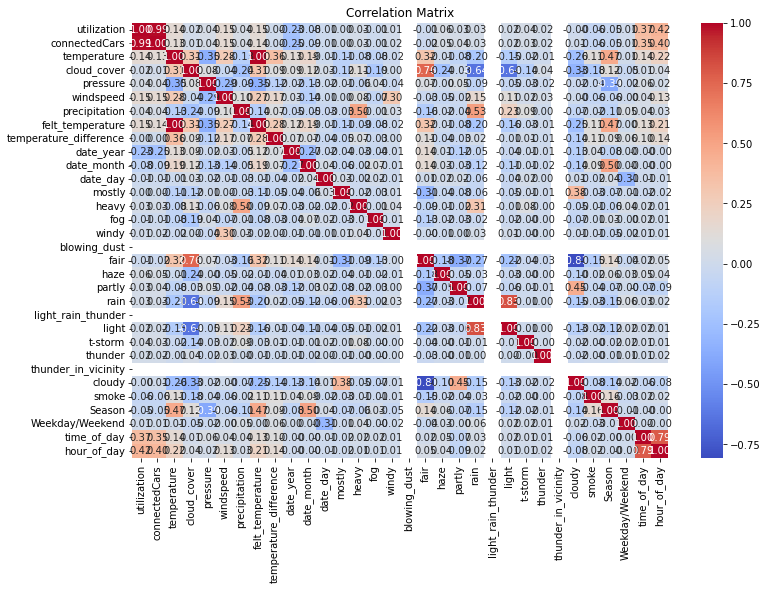

Correlation with connectedCars:
connectedCars             1.000000
utilization               0.990978
hour_of_day               0.396529
time_of_day               0.345700
windspeed                 0.149439
felt_temperature          0.138441
temperature               0.134928
haze                      0.049527
precipitation             0.041141
partly                    0.040426
pressure                  0.039203
t-storm                   0.033941
rain                      0.027314
heavy                     0.027117
light                     0.020528
thunder                   0.019337
windy                     0.015603
cloud_cover               0.014753
Weekday/Weekend           0.007911
cloudy                    0.005770
mostly                    0.002350
temperature_difference    0.001715
fog                      -0.009617
date_day                 -0.012160
fair                     -0.018145
Season                   -0.051797
smoke                    -0.064761
date_month             

In [119]:

# Compute correlation matrix
correlation_matrix = merged_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Correlation with target feature
target_correlation = correlation_matrix['connectedCars'].sort_values(ascending=False)
print("Correlation with connectedCars:")
print(target_correlation)


In [120]:
merged_data = merged_data.drop_duplicates()
X = merged_data[["temperature","time_of_day","Season","windspeed","hour_of_day","date_month","date_year"]]
y = merged_data[["connectedCars"]]

In [121]:
y.head()

,connectedCars
0,4
1,19
2,19
3,19
4,19


In [122]:
y.describe()

,connectedCars
count,21476.000000
mean,10.760104
std,18.592151
min,0.000000
25%,0.000000
50%,1.000000
75%,10.000000
max,61.000000


In [123]:
#X = X.drop(["precipitation","haze"], axis= 1)
#X = X.drop(["haze","smoke"], axis= 1)

X.head()

,temperature,time_of_day,Season,windspeed,hour_of_day,date_month,date_year
0,13.0,2,3,0.0,13,10.0,2018.0
1,14.0,2,3,0.0,14,10.0,2018.0
2,14.0,2,3,0.0,14,10.0,2018.0
3,15.0,2,3,0.0,14,10.0,2018.0
4,17.0,2,3,0.0,15,10.0,2018.0


In [124]:
X.var()

temperature    42.385964
time_of_day     1.206710
Season          1.338069
windspeed      45.878048
hour_of_day    46.590838
date_month     12.821357
date_year       0.431666
dtype: float64

In [125]:
X.describe()

,temperature,time_of_day,Season,windspeed,hour_of_day,date_month,date_year
count,21476.000000,21476.000000,21476.000000,21476.000000,21476.000000,21476.000000,21476.000000
mean,17.566307,1.387689,1.516670,8.391693,11.548612,6.895092,2019.336375
std,6.510450,1.098504,1.156749,6.773334,6.825748,3.580692,0.657013
min,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2018.000000
25%,13.000000,0.000000,0.000000,0.000000,6.000000,4.000000,2019.000000
50%,17.000000,1.000000,2.000000,7.000000,12.000000,7.000000,2019.000000
75%,22.000000,2.000000,3.000000,13.000000,17.000000,10.000000,2020.000000
max,46.000000,3.000000,3.000000,57.000000,23.000000,12.000000,2021.000000


In [126]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21476 entries, 0 to 21940
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  21476 non-null  float64
 1   time_of_day  21476 non-null  int64  
 2   Season       21476 non-null  int64  
 3   windspeed    21476 non-null  float64
 4   hour_of_day  21476 non-null  int64  
 5   date_month   21476 non-null  float64
 6   date_year    21476 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 1.3 MB


In [127]:
X.isna().sum()


temperature    0
time_of_day    0
Season         0
windspeed      0
hour_of_day    0
date_month     0
date_year      0
dtype: int64

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras_tuner import HyperModel, RandomSearch
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [129]:
# initialise model
model = Sequential(
    [Dense(160, activation="relu", input_shape=[X_train.shape[1]]),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
     Dense(32, activation="relu"),
      Dense(32, activation="relu"),
       Dense(32, activation="relu"),
       Dense(32, activation="relu"),
       Dense(32, activation="relu"),
     Dense(1)])

/Users/mariustheobald/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [130]:
# compile model
model.compile(optimizer="adam", loss = "mean_squared_error",
             metrics=["mae"])

In [131]:
# train model
epochs = 50

history = model.fit(X_train, y_train.values,
                   epochs=epochs, validation_split=0.3)

Epoch 1/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 307.4644 - mae: 10.8608 - val_loss: 193.9180 - val_mae: 9.2660
Epoch 2/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 202.6743 - mae: 9.2246 - val_loss: 197.2567 - val_mae: 8.5944
Epoch 3/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 193.9534 - mae: 8.7263 - val_loss: 176.9353 - val_mae: 8.1762
Epoch 4/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 186.5520 - mae: 8.6248 - val_loss: 179.0498 - val_mae: 8.0968
Epoch 5/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 184.2670 - mae: 8.5034 - val_loss: 174.8263 - val_mae: 8.0948
Epoch 6/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 175.2648 - mae: 8.1676 - val_loss: 167.6627 - val_mae: 7.9026
Epoch 7/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 169.6263 - mae: 7.9841 - val_loss: 168.8501 - val_mae: 7.8601
Epoch 8/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 173.4501 - mae: 8.0379 - val_loss: 167.4509 - val_mae: 8.0929
Epoch 9/50
329/329 ━━━━

In [135]:
# Make predictions
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [136]:
print(r2)

0.5470103025436401


In [137]:
# Evaluating the model on test data
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 164.1021 - mae: 7.3498
Test Loss: 161.0272216796875, Test MAE: 7.2866973876953125
